# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project 4: Smartcab

## Project Report

You will be required to submit a project report along with your modified agent code as part of your submission. As you complete the tasks below, include thorough, detailed answers to each question provided in italics.

### Implement a Basic Driving Agent

To begin, your only task is to get the smartcab to move around in the environment. At this point, you will not be concerned with any sort of optimal driving policy. Note that the driving agent is given the following information at each intersection:

The next waypoint location relative to its current location and heading.
The state of the traffic light at the intersection and the presence of oncoming vehicles from other directions.
The current time left from the allotted deadline.

To complete this task, simply have your driving agent choose a random action from the set of possible actions (None, 'forward', 'left', 'right') at each intersection, disregarding the input information above. Set the simulation deadline enforcement, enforce_deadline to False and observe how it performs.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### QUESTION: 
Observe what you see with the agent's behavior as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note?

In [2]:
df = pd.DataFrame(columns=['reached', 'goal_distance','distance_traveled', 'steps'])

df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':102,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':21,'steps':31 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':26,'steps':42 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':58,'steps':72 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':12,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':51,'steps':73 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':100,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':37,'steps':47 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':74,'steps':101 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':53,'steps':64 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':7,'distance_traveled':110,'steps':135 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':38,'steps':57 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':44,'steps':57 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':103,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':89,'steps':125 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':86,'steps':117 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':97,'steps':125 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':104,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':14,'steps':14 }, ignore_index=True)

df['color'] = np.where(df['reached']==True, 'green', 'red')

print df

   reached  goal_distance  distance_traveled  steps  color
0    False            6.0              102.0  130.0    red
1     True            6.0               21.0   31.0  green
2     True            4.0               26.0   42.0  green
3     True            5.0               58.0   72.0  green
4     True            8.0               12.0   16.0  green
5     True            4.0               51.0   73.0  green
6    False            6.0              100.0  130.0    red
7     True            5.0               37.0   47.0  green
8     True            6.0               74.0  101.0  green
9     True            5.0               53.0   64.0  green
10   False            7.0              110.0  135.0    red
11    True            4.0               38.0   57.0  green
12    True            8.0               44.0   57.0  green
13   False            6.0              103.0  130.0    red
14   False            5.0               89.0  125.0    red
15    True            7.0                7.0    6.0  gre

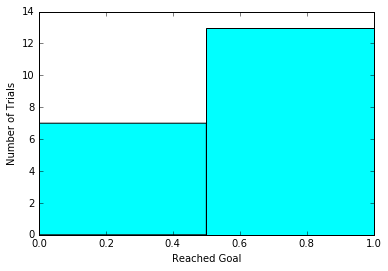

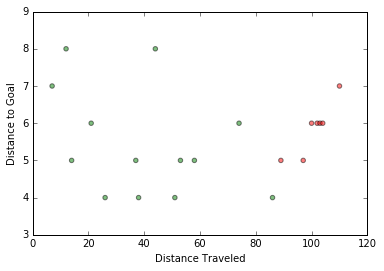

In [4]:
# the histogram of the data
plt.hist(df['reached'], bins=2, facecolor='cyan')
plt.xlabel('Reached Goal')
plt.ylabel('Number of Trials')
plt.show()

# the scatterplot of distance traveled versus goal distance
plt.scatter(df['distance_traveled'], df['goal_distance'], c=df['color'], alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Distance to Goal')
plt.show()

**Answer: ** 

See above analysis of twenty logged trials. The agent does reaches the goal the majority of the time (13 of 20 or 65%) however there does not seem to be a correlation in the scatter plot between the original distance to the goal and how far the agent has to travel to reach it (aside from the fact that the longer distance traveled points tend to not reach the goal but the deadline instead). Even some of the longest distances to the goal result in the shorter distances traveled by the agents. 

The key behavior noticed that seems outside of what is expected is that the grid space is toroidal - if the agent moves forward facing up on the top row, it reappears at the bottom row in that column and similarly on the left and right columns. This should partially explain the above observation about the larger distances to goals because the agent could have randomly taken a shortcut across the boundary to a goal that has a calculated Manhattan style distance that does not take into account the space "wrapping."

### Inform the Driving Agent

Now that your driving agent is capable of moving around in the environment, your next task is to identify a set of states that are appropriate for modeling the smartcab and environment. The main source of state variables are the current inputs at the intersection, but not all may require representation. You may choose to explicitly define states, or use some combination of inputs as an implicit state. At each time step, process the inputs and update the agent's current state using the self.state variable. Continue with the simulation deadline enforcement enforce_deadline being set to False, and observe how your driving agent now reports the change in state as the simulation progresses.

### Question:

What states have you identified that are appropriate for modeling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem?

**Answer: ** 

These five conditions are the key descriptors of full state model:
- The next waypoints (forward, left, right)
- The color of the light (red or green)
- The existance of and next waypoint of forward oncoming traffic (None, forward, left, right)
- The existance of and next waypoint of left oncoming traffic (None, forward, left, right)
- The existance of and next waypoint of right oncoming traffic (None, forward, left, right)

The combinations of these five conditions describe all the states that guide our smartcab's decision making so that it can learn:

### Optional:

How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

**Answer: ** 

There are 384 total possible states for the smartcab agent based on the combinations of the five conditions above. This is found by multiplying the number of possible options for each condition (3x2x4x4x4=384). This is a rather large number of possible states because the agent needs to visit each one multiple times to learn which decision is better for the next waypoint. (In the Q Learning video the theory expects we visit each state an infinite number of times to converge.)

In [9]:
df = pd.DataFrame(columns=['reached', 'goal_distance','distance_traveled', 'steps'])

df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':14,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':9,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':8,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':22,'steps':21 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':5,'steps':4 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':9,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':4,'steps':3 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':5,'steps':4 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':11,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':4,'steps':3 }, ignore_index=True)

df['color'] = np.where(df['reached']==True, 'green', 'red')

print df

   reached  goal_distance  distance_traveled  steps  color
0     True            7.0               14.0   13.0  green
1     True            4.0                9.0    8.0  green
2     True            8.0               13.0   12.0  green
3     True            4.0                8.0    7.0  green
4     True            4.0                7.0    6.0  green
5     True            6.0               12.0   11.0  green
6     True            7.0               22.0   21.0  green
7     True            4.0                5.0    4.0  green
8     True            5.0               13.0   12.0  green
9     True            6.0                9.0    8.0  green
10    True            5.0               10.0    9.0  green
11    True            4.0                6.0    5.0  green
12    True            6.0               13.0   12.0  green
13    True            6.0                4.0    3.0  green
14    True            4.0                5.0    4.0  green
15    True            6.0                7.0    6.0  gre

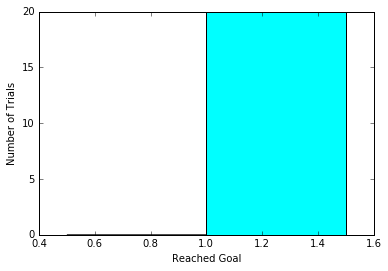

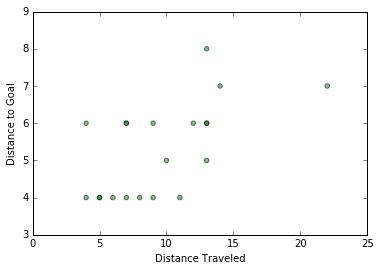

In [10]:
# the histogram of the data
plt.hist(df['reached'], bins=2, facecolor='cyan')
plt.xlabel('Reached Goal')
plt.ylabel('Number of Trials')
plt.show()

# the scatterplot of distance traveled versus goal distance
plt.scatter(df['distance_traveled'], df['goal_distance'], c=df['color'], alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Distance to Goal')
plt.show()

### Observation:
By removing the random next_waypoint assignment, now all of our trials result in a successful reaching of the goal and all of the distances required to reach the goal are far smaller

### Implement a Q-Learning Driving Agent

With your driving agent being capable of interpreting the input information and having a mapping of environmental states, your next task is to implement the Q-Learning algorithm for your driving agent to choose the best action at each time step, based on the Q-values for the current state and action. Each action taken by the smartcab will produce a reward which depends on the state of the environment. The Q-Learning driving agent will need to consider these rewards when updating the Q-values. Once implemented, set the simulation deadline enforcement enforce_deadline to True. Run the simulation and observe how the smartcab moves about the environment in each trial.

### Question:

What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?